In [2]:
import pandas as pd
import numpy as np
from dateutil.parser import parse as parse_date
import matplotlib.pyplot as plt

data = pd.read_csv("us-states.csv")
print(data.head())

        date       state  fips  cases  deaths
0  1/21/2020  Washington    53      1       0
1  1/22/2020  Washington    53      1       0
2  1/23/2020  Washington    53      1       0
3  1/24/2020    Illinois    17      1       0
4  1/24/2020  Washington    53      1       0


C:\Users\hythe\AppData\Local\Temp\ipykernel_30356\2864954852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['new_case']=df_state.cases.diff() #get new cases
C:\Users\hythe\AppData\Local\Temp\ipykernel_30356\2864954852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state.date=pd.to_datetime(df_state.date) #transform pandas date object
C:\Users\hythe\AppData\Local\Temp\ipykernel_30356\2864954852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

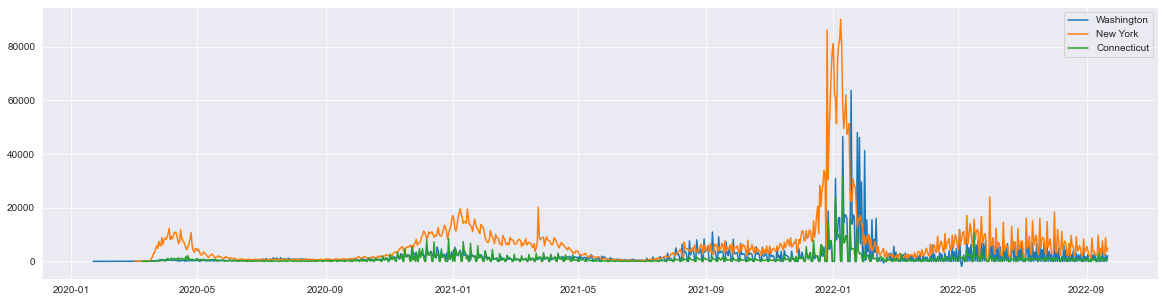

In [3]:
'''plot a list of states and their new cases'''
def plot_state_newcase(states):
    plt.figure(figsize=(20, 5))
    for statename in states:
        df_state=data[data.state==statename]
        df_state['new_case']=df_state.cases.diff() #get new cases
        df_state.date=pd.to_datetime(df_state.date) #transform pandas date object
        # print(df_state)
        plt.plot(df_state.date[1:],df_state.new_case[1:],label=statename)
        plt.legend()

    plt.savefig('state_newcases.jpg')
    plt.show()

plot_state_newcase(['Washington','New York','Connecticut'])

In [20]:
'''find the date of highest new cases of a state'''
def find_highest_date(statename):
    df_new=data.loc[data.state==statename]
    df_new['new_cases']=df_new.cases.diff() #get new cases
    maxnum=df_new.new_cases.max()
    row=df_new.loc[df_new.new_cases==maxnum]
    row=row.reset_index()
    # print(row)
    return row.date.values

High_date=find_highest_date('Washington')
print('the highest new cases corresponding date For the chosen state is',High_date)

the highest new cases corresponding date For the chosen state is ['1/18/2022']


C:\Users\hythe\AppData\Local\Temp\ipykernel_30356\3584785230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['new_cases']=df_new.cases.diff() #get new cases


In [30]:
def compare_states(state1,state2):
    df_1=data[data.state==state1].reset_index()
    df_2=data[data.state==state2].reset_index()
    df_1['new_case']=df_1.cases.diff()
    df_2['new_case']=df_2.cases.diff()
    max1=df_1.new_case.max()
    max2=df_2.new_case.max()
    if max1>max2:
        print('This state has larger the highest new cases than another one:',state1)
    elif max1==max2:
        print('The two states have the same highest new cases')
    else:
        print('This state has larger the highest new cases than another one:',state2)
    date1=df_1.loc[df_1.new_case==max1].date.values
    date2=df_2.loc[df_2.new_case==max2].date.values
    date1=parse_date(date1[0])
    date2=parse_date(date2[0])
    print('Days between 2 peaks (second state peak minus first state peak):',(date2-date1).days)

compare_states('Connecticut','Washington')

This state has larger the highest new cases than another one: Washington
Days between 2 peaks (second state peak minus first state peak): 8
